# Attribute Inference Attack (AIA) Dataset A

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = '' #home directory of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/PRIVACY'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for membership attack simulation
from attribute_inference import DataPreProcessor
from attribute_inference import RiskAttributesPredictors
from attribute_inference import identified_attributes_percentage

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/A_Diabetes_Data_Real_Train.csv',
            'GM' : HOME_PATH + 'SYNTHETIC DATASETS/GM/A_Diabetes_Data_Synthetic_GM.csv',
            'SDV' : HOME_PATH + 'SYNTHETIC DATASETS/SDV/A_Diabetes_Data_Synthetic_SDV.csv',
            'CTGAN' : HOME_PATH + 'SYNTHETIC DATASETS/CTGAN/A_Diabetes_Data_Synthetic_CTGAN.csv',
            'WGANGP' : HOME_PATH + 'SYNTHETIC DATASETS/WGANGP/A_Diabetes_Data_Synthetic_WGANGP.csv'}
categorical_columns = ['gender','age','admission_type_id','discharge_disposition_id','admission_source_id','max_glu_serum',
                      'A1Cresult','change','diabetesMed','readmitted']
categorical_columns = ['gender','age','admission_type_id','discharge_disposition_id','admission_source_id','max_glu_serum',
                      'A1Cresult','change','diabetesMed','readmitted']
numerical_columns = ['encounter_id','patient_nbr','time_in_hospital','num_lab_procedures','num_procedures','num_medications',
                    'number_outpatient','number_emergency','number_inpatient','number_diagnoses']
data = dict()
qid_columns = ['gender','age','admission_type_id','discharge_disposition_id','admission_source_id']
risk_attributes = ['time_in_hospital','num_lab_procedures','num_procedures','num_medications', 'number_outpatient',
                   'number_emergency','number_inpatient','number_diagnoses','max_glu_serum', 'A1Cresult','change','diabetesMed',
                   'readmitted']
data_qid = dict()
data_risk = dict()

In [4]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category')
        if col in ['max_glu_serum', 'A1Cresult','change','diabetesMed','readmitted'] :
            data[name][col] = data[name][col].cat.codes
    data_qid[name] = data[name][qid_columns]
    data_risk[name] = data[name][risk_attributes]
data

{'Real':        encounter_id  patient_nbr  gender      age admission_type_id  \
 0          81844290        94788  Female  [70-80)                 1   
 1         396159158    135023315    Male  [50-60)                 1   
 2          31258956     18397782    Male  [80-90)                 1   
 3         210691074     67509558    Male  [80-90)                 1   
 4         104902980     23272362  Female  [70-80)                 1   
 ...             ...          ...     ...      ...               ...   
 81407      31296060      3344202    Male  [70-80)                 1   
 81408     159139902     93611655    Male  [60-70)                 5   
 81409     232191828     85600899    Male  [70-80)                 3   
 81410       6740700      8208234  Female  [60-70)                 6   
 81411      60115668     77943780  Female  [40-50)                 6   
 
       discharge_disposition_id admission_source_id  time_in_hospital  \
 0                            1                   7  

In [5]:
data_qid

{'Real':        gender      age admission_type_id discharge_disposition_id  \
 0      Female  [70-80)                 1                        1   
 1        Male  [50-60)                 1                        1   
 2        Male  [80-90)                 1                        1   
 3        Male  [80-90)                 1                        3   
 4      Female  [70-80)                 1                       11   
 ...       ...      ...               ...                      ...   
 81407    Male  [70-80)                 1                        1   
 81408    Male  [60-70)                 5                        1   
 81409    Male  [70-80)                 3                        3   
 81410  Female  [60-70)                 6                       25   
 81411  Female  [40-50)                 6                        1   
 
       admission_source_id  
 0                       7  
 1                       7  
 2                       7  
 3                       7  
 4   

In [6]:
data_risk

{'Real':        time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
 0                     4                  48               0               11   
 1                     1                  42               0                5   
 2                     4                  44               0               10   
 3                     3                  54               0                8   
 4                    11                  35               3               23   
 ...                 ...                 ...             ...              ...   
 81407                 2                  35               0               12   
 81408                 5                  63               2               23   
 81409                 3                  55               1               33   
 81410                12                  77               2               21   
 81411                 1                   2               5               17   
 
        number_out

## 2. Train models to predict attributes values

In [7]:
#initialize classifiers
categorical_columns = ['gender','age','admission_type_id','discharge_disposition_id','admission_source_id']
numerical_columns = None
categories = [np.array(range(3)), np.array(range(10)), np.array(range(9)), np.array(range(29)), np.array(range(21))]
    
classifiers_all = dict()
data_preprocessors = dict()
attributes_models_all = dict()

for name in SYNTHESIZERS : 
    print(name)
    data_preprocessors[name] = DataPreProcessor(categorical_columns, numerical_columns, categories)
    x_train = data_preprocessors[name].preprocess_train_data(data_qid[name])
    
#     attributes_models = dict()
#     attributes_models = train_attributes_prediction_models(data_risk[name], x_train)
    attributes_models_all[name] = RiskAttributesPredictors(data_risk[name], qid_columns)
    attributes_models_all[name].train_attributes_prediction_models(x_train)
    
    print('####################################################')

GM
Model trained for time_in_hospital attribute
Model trained for num_lab_procedures attribute
Model trained for num_procedures attribute
Model trained for num_medications attribute
Model trained for number_outpatient attribute
Model trained for number_emergency attribute
Model trained for number_inpatient attribute
Model trained for number_diagnoses attribute
Model trained for max_glu_serum attribute
Model trained for A1Cresult attribute
Model trained for change attribute
Model trained for diabetesMed attribute
Model trained for readmitted attribute
####################################################
SDV
Model trained for time_in_hospital attribute
Model trained for num_lab_procedures attribute
Model trained for num_procedures attribute
Model trained for num_medications attribute
Model trained for number_outpatient attribute
Model trained for number_emergency attribute
Model trained for number_inpatient attribute
Model trained for number_diagnoses attribute
Model trained for max_glu_

## 3. Read Real Data and Find Combinations

In [8]:
#read real dataset
real_data = pd.read_csv(HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/A_Diabetes_Data_Real_Train.csv')
for col in categorical_columns :
    real_data[col] = real_data[col].astype('category')
    if col in ['max_glu_serum', 'A1Cresult','change','diabetesMed','readmitted'] :
        real_data[col] = real_data[col].cat.codes
real_data = real_data.sample(frac=1)
real_data = real_data[0:int(len(real_data)*0.5)]
real_data

encounter_id  patient_nbr  gender      age admission_type_id  \
20385        419304     99715041    Male  [40-50)                 2   
14942      41635764      1447614  Female  [70-80)                 2   
24132     268287810    106556337  Female  [50-60)                 1   
25010     287632770     33897924    Male  [50-60)                 1   
55043     189590814     60979608    Male  [60-70)                 1   
...             ...          ...     ...      ...               ...   
49414     123284022     29744919    Male  [70-80)                 1   
21786      96346638     83683251    Male  [70-80)                 1   
38957     158395398     77140440    Male  [60-70)                 3   
5055      188031654     81920754  Female  [80-90)                 1   
22621      92067954     23707773    Male  [50-60)                 5   

      discharge_disposition_id admission_source_id  time_in_hospital  \
20385                        1                   2                 7   
14942                       18                   1                 3   
24132                        1                   7                 4   
25010                        6                   7                 3   
55043                        1                   7                 1   
...                        ...                 ...               ...   
49414                        6                   7                 6   
21786                        1                   7                 3   
38957                        1                   1                 4   
5055                         1                   7                 4   
22621                        1                  17                 1   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
20385                  36               2                9                  0   
14942                  27               2               15                  1   
24132                  34               0               18                  0   
25010                  59               0               14                  0   
55043                  53               0                8                  0   
...                   ...             ...              ...                ...   
49414                  39               2               20                  3   
21786                  48               1               13                  1   
38957                  11               1               16                  0   
5055                   59               0               21                  0   
22621                  11               0               10                  0   

       number_emergency  number_inpatient  number_diagnoses max_glu_serum  \
20385                 0                 0                 5          None   
14942                 0                 1                 9          None   
24132                 0                 0                 9          None   
25010                 0                 1                 7          None   
55043                 0                 1                 9          None   
...                 ...               ...               ...           ...   
49414                 0                 0                 9          None   
21786                 0                 2                 8          None   
38957                 0                 0                 7          None   
5055                  0                 0                 9          None   
22621                 0                 0                 9          >200   

      A1Cresult change diabetesMed readmitted  
20385      None     No         Yes        >30  
14942      None     No          No        >30  
24132      None     Ch         Yes         NO  
25010      None     Ch         Yes         NO  
55043      None     Ch         Yes         NO  
...         ...    ...         ...        ...  
49414      None     Ch         Yes         NO  
21786  

In [9]:
combinations = real_data[qid_columns]
combinations.drop_duplicates(keep='first',inplace=True) 
combinations

gender       age admission_type_id discharge_disposition_id  \
20385    Male   [40-50)                 2                        1   
14942  Female   [70-80)                 2                       18   
24132  Female   [50-60)                 1                        1   
25010    Male   [50-60)                 1                        6   
55043    Male   [60-70)                 1                        1   
...       ...       ...               ...                      ...   
62583    Male   [60-70)                 1                        9   
60032  Female  [90-100)                 3                        5   
43236  Female   [20-30)                 6                        7   
47362    Male   [60-70)                 2                       11   
32206  Female   [60-70)                 6                       20   

      admission_source_id  
20385                   2  
14942                   1  
24132                   7  
25010                   7  
55043                   7  
...                   ...  
62583                   7  
60032                   6  
43236                  17  
47362                   2  
32206                   1  

[2175 rows x 5 columns]

In [10]:
results_data_all = dict()
columns_results = ['gender','age','admission_type_id','discharge_disposition_id','admission_source_id','time_in_hospital_rmse',
                   'num_lab_procedures_rmse','num_procedures_rmse','num_medications_rmse', 'number_outpatient_rmse',
                   'number_emergency_rmse','number_inpatient_rmse','number_diagnoses_rmse','max_glu_serum_accuracy',
                   'A1Cresult_accuracy','change_accuracy','diabetesMed_accuracy','readmitted_accuracy']

for name in SYNTHESIZERS : 
    print(name)
    results_data = pd.DataFrame(columns = columns_results)
    
    for comb in combinations.values :
    
        batch = real_data.loc[(real_data['gender'] == comb[0]) & (real_data['age'] == comb[1]) &
                              (real_data['admission_type_id'] == comb[2]) & (real_data['discharge_disposition_id'] == comb[3]) &
                             (real_data['admission_source_id'] == comb[4])]
        
        row_data = (batch[qid_columns].values[0]).tolist()
        print(row_data)
        x_test = data_preprocessors[name].preprocess_test_data(batch[qid_columns])
        print(x_test.shape)
        
        row = attributes_models_all[name].evaluate_attributes_prediction_models(x_test, batch, columns_results)
        
        results_data = results_data.append(row)
        
    results_data_all[name] = results_data
    print('#######################################')

GM
['Male', '[40-50)', 2, 1, 2]
(9, 72)
Model evaluated for time_in_hospital attribute
Model evaluated for num_lab_procedures attribute
Model evaluated for num_procedures attribute
Model evaluated for num_medications attribute
Model evaluated for number_outpatient attribute
Model evaluated for number_emergency attribute
Model evaluated for number_inpatient attribute
Model evaluated for number_diagnoses attribute
Model evaluated for max_glu_serum attribute
Model evaluated for A1Cresult attribute
Model evaluated for change attribute
Model evaluated for diabetesMed attribute
Model evaluated for readmitted attribute
['Female', '[70-80)', 2, 18, 1]
(15, 72)
Model evaluated for time_in_hospital attribute
Model evaluated for num_lab_procedures attribute
Model evaluated for num_procedures attribute
Model evaluated for num_medications attribute
Model evaluated for number_outpatient attribute
Model evaluated for number_emergency attribute
Model evaluated for number_inpatient attribute
Model eval

In [11]:
results_data_all

{'GM':     gender       age admission_type_id discharge_disposition_id  \
 0     Male   [40-50)                 2                        1   
 0   Female   [70-80)                 2                       18   
 0   Female   [50-60)                 1                        1   
 0     Male   [50-60)                 1                        6   
 0     Male   [60-70)                 1                        1   
 ..     ...       ...               ...                      ...   
 0     Male   [60-70)                 1                        9   
 0   Female  [90-100)                 3                        5   
 0   Female   [20-30)                 6                        7   
 0     Male   [60-70)                 2                       11   
 0   Female   [60-70)                 6                       20   
 
    admission_source_id  time_in_hospital_rmse  num_lab_procedures_rmse  \
 0                    2               0.111111                 0.000000   
 0                    1   

## 5. Visuzalize obtained results

In [12]:
results_columns = ['time_in_hospital_rmse','num_lab_procedures_rmse','num_procedures_rmse','num_medications_rmse',
                   'number_outpatient_rmse','number_emergency_rmse','number_inpatient_rmse','number_diagnoses_rmse',
                   'max_glu_serum_accuracy','A1Cresult_accuracy','change_accuracy','diabetesMed_accuracy','readmitted_accuracy']
len(results_columns)

13

In [13]:
for name in SYNTHESIZERS : 
    identified_attributes = identified_attributes_percentage(results_data_all[name], results_columns)
    print(name,' : ', identified_attributes)

GM  :  0.31
SDV  :  0.69
CTGAN  :  0.38
WGANGP  :  0.31


In [14]:
boxplots_data = dict()

for c in results_columns :
    boxplots_data[c] = results_data_all[SYNTHESIZERS[0]][c]
    
    for i in range(1,len(SYNTHESIZERS)) :
        boxplots_data[c] = np.column_stack((boxplots_data[c], results_data_all[SYNTHESIZERS[i]][c]))

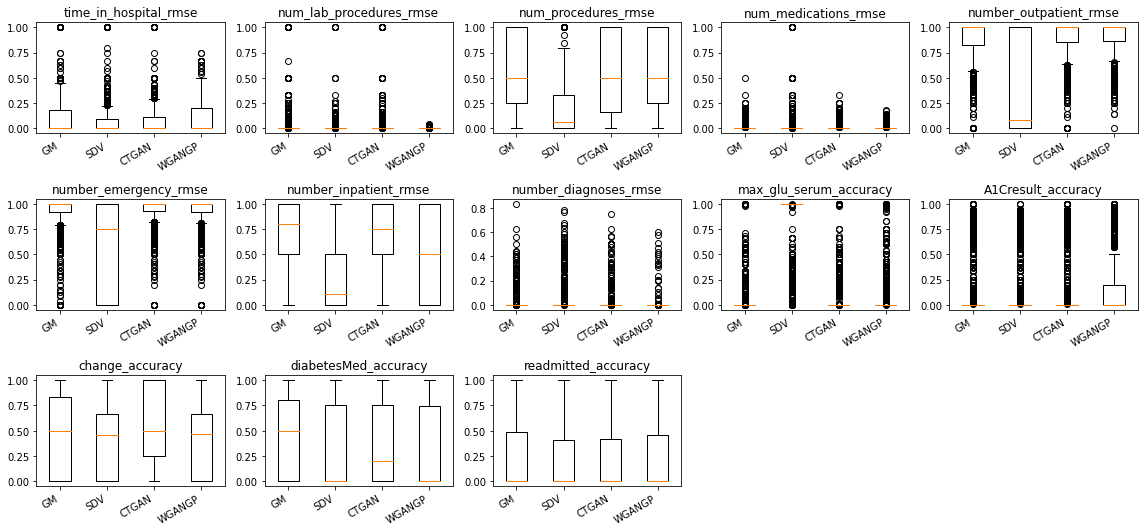

In [15]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(16,2.5*3))
axs_idxs = [[0,0], [0,1], [0,2], [0,3], [0,4], [1,0], [1,1], [1,2], [1,3], [1,4], [2,0], [2,1], [2,2]]

idx = dict(zip(results_columns,axs_idxs))

for c in results_columns :
    ax = axs[idx[c][0], idx[c][1]]
    ax.boxplot(boxplots_data[c])
    ax.set_title(c)
    ax.set_xticklabels(SYNTHESIZERS)
    
for ax in axs.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, ha="right")    
    
fig.delaxes(axs[2,3])
fig.delaxes(axs[2,4])
plt.tight_layout()
fig.savefig('INFERENCE TESTS RESULTS/ATTRIBUTES INFERENCE TESTS RESULTS.svg', bbox_inches='tight')